# Online Retail - Getting to know the data and Data cleaning

## Introduction

This notebook is the first part of a series of online Retail data analysis. In this first part, we shall begin by understanding the dataset and cleaning it up for analysis. 

Some of the processes we go through here are key in the real world. It helps us critique the data and pose relavant data quality questions to the data originators - when you are not querrying the database yourself and data is handed to you. This all helps us to ensure that any insights from the data are valid.

Two years (Dec-2009 to Dec-2011) of transactions data from a small UK-based non-store business will be used in this project. There are two main sources for the same dataset on kaggle: <a href = "https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci"> online-retail-ii-uci</a> provided by user **<a href = "https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci"> Miyabon</a>** in *csv format*(csv_data) and <a href = "https://www.kaggle.com/code/ekrembayar/rfm-analysis-online-retail-ii"> Online Retail II dataset</a> provided as an excel format in two sheets, `Year 2009-2010` and `Year 2010-2011`by <a href = "https://www.kaggle.com/datasets/kabilan45/online-retail-ii-dataset">Kabilan, (2019)</a> (excel_data). 

The csv_data is more popular on kaggle and contains good metadata description while the less used excel_data does not contain metadata description but is evidently the same dataset as I will demonstrate in this notebook. I used these two sources to complement each other, for example the csv_data provides metadata description and aid general understanding of the dataset while excel_data provides the cross-checks to ensure validity.

While pre-processing the csv_data, I noticed unusually high duplicates in data records in december 2010. I used the excel_data to confirm that in preparation of the csv_data, it appears an overlap in data records at the end of `Year 2009-2010` and the start of `Year 2010-2011` was created.

In this notebook, I clean up such duplicates and go through the process of understanding, cleaning this dataset and putting it in a state ready to analyse.

# Table of Contents  

1. [Import packages](#import_packages)  
2. [Read the data](#read_data)  
3. [Data Description](#data_description)   
4. [Check Duplicates](#check_duplicates)  
5. [Exploring data in each column](#colum_descr)  
5.1 [Invoice](#invoice)  
5.2 [Quantity](#Quantity)  
5.3 [InvoiceDate](#invoiceDate)  
5.4 [Customer ID](#customerID)  
5.5 [Country](#country)    
            
6. [Missing Values](#na_vals)
7. [Conclusion](#conclusion)
8. [References](#references)


## 1. Import packages <a class="anchor" id="import_packages"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from collections import defaultdict
import datetime as dt

## 2. Read the data <a class="anchor" id="read_data"></a>
We read the csv_data using `pandas.read_csv()`. We then print the first 5 lines of the dataset and information about the columns.

In [2]:
data_path = './dataset/online_retail_II.csv'
# read first sheet of data
csv_data = pd.read_csv(data_path)
# sort by InvoiceDate and reset the index
csv_data = csv_data.sort_values(by = 'InvoiceDate').reset_index(drop = True)
csv_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
# information about the columns
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


## 3. Data Description <a class="anchor" id="data_description"></a>

The description of each column is avaialable on the <a href = "https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci"> kaggle data page</a>. 
Each row represents a transaction of unique item (**StockCode**) by specific customer (**Customer ID**) on a specific date (**InvoiceDate**). The **Quantity** represents the total number of units and the **Price** is the unit price for **StockCode**. An **Invoice** can include multiple **StockCode**. **Country** represents the customer's country and **Descripion** is the item's description.  

## 4. Check Duplicates  <a class="anchor" id="check_duplicates"></a>
We shall first check if there is duplicated transactions in the dataset

In [4]:
print('The number of duplicate data records: ', csv_data.sort_values(by = 'InvoiceDate').duplicated().sum())

The number of duplicate data records:  34335


We can see that the dataset contains a significant number of duplicates - 34,335. Visually inspecting these duplicated rows of data, confirms that such records do appear as duplicates. For example, row indices 370 and 398 appear to show the same item for the same customer at the same InvoiceDate.

In [5]:
# visually inspect some of the duplicated rows in csv_data
duplicated = csv_data[csv_data.duplicated(keep = False)].sort_values(by = ['InvoiceDate','Invoice','StockCode'])
duplicated

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
370,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
398,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
366,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
385,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
373,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067153,581538,23275,SET OF 3 HANGING OWLS OLLIE BEAK,1,2011-12-09 11:34:00,1.25,14446.0,United Kingdom
1067119,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
1067152,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
1067099,581538,23343,JUMBO BAG VINTAGE CHRISTMAS,1,2011-12-09 11:34:00,2.08,14446.0,United Kingdom


We can inspect the nature of this duplicated data by plotting the number of occurrences per month.
This is shown below and it shows that much as there is duplicated records in all months, December 2010 stands out and points to something more going on in the data during that month.

At this point, there would be two key questions about the dataset:
1. Why is there what appears as duplicated records in transactions history?
    One would expect that when more than 1 item of the same stockCode is being purchased by the customer, it would not create duplicates but just increment the Quantity - this seems the case in other transactions.
2. What else is going on in December 2010?

In the real world, these questions would be put to the data originators to ensure validity. In this case, regarding question (1) above, since duplicates appear fairly regulary through transaction history and there is no discernable pattern to them, I have assumed that perhaps there was a glitch in the system that didn't increment the Quantity but instead captured multi-buy items as different line items on the same invoice. As such, I will not be dropping these records out of the analysis.

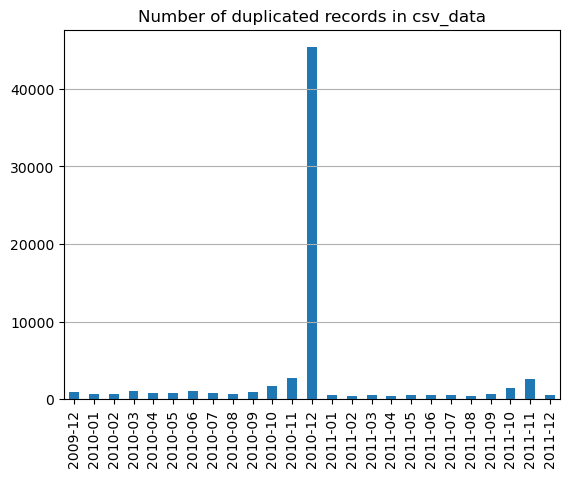

In [6]:
# add year_month column to duplicated data
duplicated['year_month'] = duplicated['InvoiceDate'].apply(lambda x: x[:7])
plt.figure()
duplicated['year_month'].value_counts(sort = False).plot.bar()
plt.title('Number of duplicated records in csv_data')
plt.grid(which = 'major', axis = 'y')
plt.show()

Regarding question(2) above, I download the excel version of the dataset in two sheets `Year 2009-2010` and `Year 2010-2011` and use it to confirm that:
- it represents the same dataset as csv_data above
- the duplicates in December 2010 are due to merging data from two files that created an overlap

I remove this data overlap from the dataset as the first part of cleaning the data

In [7]:
# read the excel data from the two sheets and concatenate into one dataset
excel_data_part1 = pd.read_excel('./dataset/online_retail_II.xlsx', sheet_name = 'Year 2009-2010')
excel_data_part2 = pd.read_excel('./dataset/online_retail_II.xlsx', sheet_name = 'Year 2010-2011')
# merged excel_data
excel_data = pd.concat([excel_data_part1, excel_data_part2])
excel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


We can see the excel_data contains exactly the same number of rows 1,067,371 as csv_data.  
We can confirm that there is data overlap at the end of `Year 2009-2010` and the beginning of `Year 2010-2011`

In [8]:
excel_data_part1_maxDate = excel_data_part1['InvoiceDate'].max() # last date in first part of dataset
excel_data_part2_minDate = excel_data_part2['InvoiceDate'].min() # start date of the second part of the dataset
print('Final date in part1 of the dataset', excel_data_part1_maxDate)
print('Start date of part2 of the dataset', excel_data_part2_minDate)

Final date in part1 of the dataset 2010-12-09 20:01:00
Start date of part2 of the dataset 2010-12-01 08:26:00


Here we confirm that there are 9 days of transactions data overlap between the two files which shows up as unusually high duplicated data in the csv_data plotted in `Number of duplicated records in csv_data` above. 

We can look a few lines of overlapped data below

In [9]:
#first few lines from Dec 2010 from the sheet Year 2009-2010
excel_data_part1[excel_data_part1['InvoiceDate'] >= dt.datetime(2010,12,1)].sort_values(by = 'InvoiceDate').head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
502938,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
502939,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
502940,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
502941,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
502942,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
# start of the data in Year 2010-2011
excel_data_part2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


We remove this overlap in the dataset and concatenate the data into a dataframe to explore further.

In [11]:
df = pd.concat(
    [excel_data_part1[excel_data_part1['InvoiceDate'] < excel_data_part2_minDate],
     excel_data_part2
    ])
df.shape

(1044848, 8)

In [12]:
print('The number of duplicate data records: ', df.sort_values(by = 'InvoiceDate').duplicated().sum())

The number of duplicate data records:  11812


There is 11,812 duplicates remaining in the data and the distribution per month is shown below.

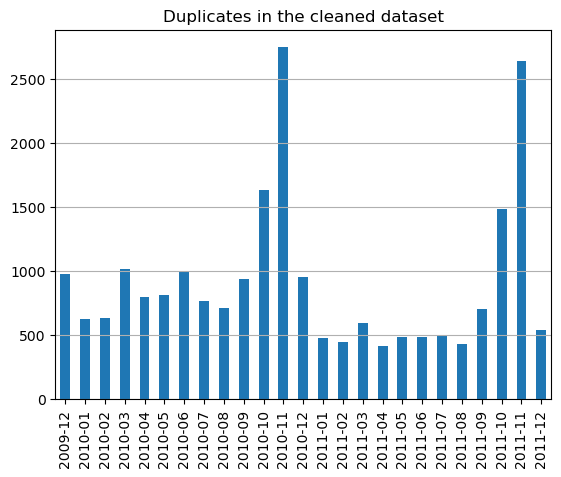

In [13]:
duplicated_df = df[df.duplicated(keep = False)].sort_values(by = ['InvoiceDate','Invoice','StockCode'])
# add year_month column to duplicated data
duplicated_df['year_month'] = duplicated_df['InvoiceDate'].dt.to_period('M')
plt.figure()
duplicated_df['year_month'].value_counts(sort = False).plot.bar()
plt.title('Duplicates in the cleaned dataset')
plt.grid(which = 'major', axis = 'y')
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044848 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1044848 non-null  object        
 1   StockCode    1044848 non-null  object        
 2   Description  1040573 non-null  object        
 3   Quantity     1044848 non-null  int64         
 4   InvoiceDate  1044848 non-null  datetime64[ns]
 5   Price        1044848 non-null  float64       
 6   Customer ID  809561 non-null   float64       
 7   Country      1044848 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 71.7+ MB


In [15]:
df.describe()

,Quantity,Price,Customer ID
count,1.044848e+06,1.044848e+06,809561.000000
mean,9.993649e+00,4.590546e+00,15319.760422
std,1.742185e+02,1.217042e+02,1695.812057
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13969.000000
50%,3.000000e+00,2.100000e+00,15248.000000
75%,1.000000e+01,4.130000e+00,16792.000000
max,8.099500e+04,3.897000e+04,18287.000000


## 5. Exploring data in each column <a class="anchor" id="colum_descr"></a>

### 5.1 Invoice <a class="anchor" id="invoice"></a>
In the data description, if `Invoice` starts with the letter 'c', it indicates a cancellation. But, what are other letter codes are in the Invoice and what do they mean?

Below, we shall check the non-int characters and their positions in the `Invoice` entries.  
 

In [16]:
def check_codes(df, col):
    '''
    check for non-int characters and their positions in string entries in col
    takes a dataframe, col. returns unique non-int characters and their positions
    '''
    string_positions = defaultdict(int)
    # check if the character in  string converts to int,
    # if valueError, add the character and its position to string_positions dict
    for item in df[col].values:
        item = str(item)  # make sure it is string
        for char in item:
            try:
                is_int = int(char)
            except ValueError:
                string_positions[(char, item.index(char))] += 1
    return string_positions



In [17]:
# structure of the Invoice column
invoice_col_len = df['Invoice'].apply(lambda x: len(str(x)))  # length of entries
print('The length of each Invoice')
print(invoice_col_len.value_counts())
print('The non-Int characters and their positions within Invoice', check_codes(df, 'Invoice'))

The length of each Invoice
6    1025677
7      19171
Name: Invoice, dtype: int64
The non-Int characters and their positions within Invoice defaultdict(<class 'int'>, {('C', 0): 19165, ('A', 0): 6})


We can now see that the `Invoice` Column contains 6 or 7 character strings. The 7 character string, 19,165 (1.9%) mostly begin with **C** with only 6 beginning with letter **A**.   

Looking at these records of data that start with **A** or **C**, we can make the following observations:
- Records with Invoice beginning with **A** 
    - represent an adjustment for bad debt and are not associated to any Customer ID
    - mostly associated with large negative `Price` value and `Quantity` of 1. Although this is not always the case. See Invoice `A563186`
    - There is some entries that are clearly related but not exactly duplicates. `A563185`, `A563186`, and `A563187`
    - It appears that these adjustments are not directly related to product sales but some accounting procedure. We shall make this assumption in the follow up analysis.
- Records with Invoice starting with **C**
    - This appear to be associated with negative values of `Quantity`, although not always. see Invoice `C496350` below. It is important to note that when Invoice starts with **C** but `Quantity` is positive, then Customer ID is null.

Other authors (Bayer, <a href="https://www.kaggle.com/code/ekrembayar/rfm-analysis-online-retail-ii">2019</a>) who have used this data confirm that `Invoices` starting with **C** represent items that were returned. However, nothing is mentioned of the invoices starting with letter **A**. 

In [18]:
# records with Invoice starting with 'C'
df[df['Invoice'].str.contains('A', na = False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [19]:
# records with Invoice starting with 'C'
df[df['Invoice'].str.contains('C', na = False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Records whose Invoice starts with **C** but have a poisitive quantity value

In [20]:
df[(df['Quantity'] > 0) & (df['Invoice'].str.contains('C', na = False))]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
76799,C496350,M,Manual,1,2010-02-01 08:24:00,373.57,NaN,United Kingdom


Additionally, we explore if there is any relationship between invoice for the purchases and cancellations. We use Customer ID 12346 below. Invoice `C541433` is most likely a cancellation of `541431` but don't share the same digits.   

**Why is this good to know?**  
 - It would not be possible to associate returns to their original purchase invoices. For example to answer questions such as, how many days after purchase do returns typically occur?

In [21]:
df[df['Customer ID'] == 12346].tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
255595,C514024,M,Manual,-1,2010-06-30 11:22:00,142.31,12346.0,United Kingdom
370048,C525099,D,Discount,-1,2010-10-04 09:54:00,1.00,12346.0,United Kingdom
371779,C525274,TEST001,This is a test product.,-1,2010-10-04 16:33:00,4.50,12346.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom


### 5.2 Quantity  <a class="anchor" id="Quantity"></a>
Quantity column is not only used to show purchased quantity but also shows the amount of cancelled/returned items by encoding the cancelled transactions as negative. These transactions all have a customer ID attached to them.
Negative Quantity is also used to encode other business outgoings and these transactions have no Customer ID attached to them. This can be seen by comparing the count of negative values of `Quantity` (22,557) which is more than the `Invoice` that start with **C** (19,165). Additionally, there is only 1 instance whose invoice starts with **C** but the `Quantity` is positive (1).  

**What do we learn from this column?**
- Negative values encode more than just returns but also other categories of cancelled sales, bad items, etc.
- if we are interested in only purchases (e.g number of orders), filtering on negative values would not be sufficient. It would be necessary to combine such filters with Invoice column starting with **C**

In [22]:
print('The number of entries with negative quantinty', df[(df['Quantity'] < 0)].shape[0])

The number of entries with negative quantinty 22557


In [23]:
print('Number of invoices for returns that also have negative quantity',
      df.loc[(df['Invoice'].str.contains('C', na = False)) & (df['Quantity'] < 0)].shape[0])

Number of invoices for returns that also have negative quantity 19164


In [24]:
# Entry of the returns that has positive quantity
df.loc[(df['Invoice'].str.contains('C', na = False)) & (df['Quantity'] >= 0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
76799,C496350,M,Manual,1,2010-02-01 08:24:00,373.57,NaN,United Kingdom


---

**What have we learnt about the data so far?**
- Each invoice number can contain several items - all captured as separate instances(rows) in the data
- Some invoices are simply accounting line items, those whose Invoice start with **A**. These typically have negative `Price`, but not always the case. It is necessary to use filtering on Invoice starting with **A** to isolate these records
- Cancellations are mostly associated with negative `Quantity`. However, this is not always the case.
- There is no relationship between the invoice numbers assigned to cancellations and their original purchase invoices
- Negative values of `Quantity` represent more than just returns but other cancelled sales relating to bad items for example.
- If we are interested in customer related transactions, then it is necessary to first drop all the null values out of the Customer ID column followed by relevant filtering on Invoice starting with C depending on the analysis.

**Why is this important**   

It is useful in forming strategies to clean up the data for a particular analysis. 
For example, in customer segmentation based on Recency, Frequency, Monetary (RFM) we need to determine:   
- How many orders from customer (Frequency)?
- When did the customer last make an order (Recency)?
- How much money have we made from the customer (Monetary)?

We follow the steps below to arrive at the three variables

1. filter data to only customer transactions - drop null values in Customer ID column
2. To determine the total monetary value, multiply quanties (both positive and negative (cancellations)) with price and sum the result
3. To determine number of orders and last order date, an extra filter to remove orders starts with **C** and **D** would be carried out to keep only the placed orders. Remember we can not associate cancellation line items with related order line items as there is no relationship between invoices. As such included orders in total number of orders may have been subsequently cancelled, but there is no way to know and hence have them removed. 

In [25]:
# prepare the customer dataset
customer_data = df.copy()
customer_data.dropna(subset = ['Customer ID'], inplace=True) # drop all rows with null customer ID
customer_data['Invoice'] = customer_data['Invoice'].astype(str) # set Invoice dtype to string
customer_data['Customer ID'] = customer_data['Customer ID'].astype(int) # set customer ID column to int
# create TotalValue column = Price * Quantity
customer_data['TotalValue'] = customer_data['Quantity'] * customer_data['Price']

# monetary value
monetary = customer_data[['Customer ID','TotalValue']].groupby('Customer ID').agg(Monetary = ('TotalValue', 'sum'))

# to compute number of orders and last order date --> extra filters to keep only positive orders
positive_orders = customer_data.copy()
positive_orders = positive_orders[(~positive_orders['Invoice'].str.contains('C', na = False))] # remove cancellations
positive_orders = positive_orders[(~positive_orders['Invoice'].str.contains('A', na = False))] # remove accounting invoices
# remove any other cancelled orders such as crushed items - represented negative quantity
positive_orders = positive_orders[(positive_orders['Quantity'] >= 0)]

# number of positive orders
frequency = positive_orders[['Customer ID','InvoiceDate']].groupby('Customer ID').agg(Frequency = ('InvoiceDate', 'count'))
# last positive order date
recency = positive_orders[['Customer ID','InvoiceDate']].groupby('Customer ID').agg(Recency = ('InvoiceDate', 'max'))

# number of customers without a positive order but with negative orders
customers_negative_orders = monetary[~monetary.index.isin(recency.index)].index
print('There is {} customers with only negative value orders and not a single postive value order'.format(len(customers_negative_orders)))

There is 61 customers with only negative value orders and not a single postive value order


It is interesting to note that there is customers with only negative value orders and not a single postive value order. I am not sure what these customers mean and I will filter them out of analysis. An example user data is shown below

In [26]:
# example data for a customer with only negative value orders
customer_data[customer_data['Customer ID'] == 12382]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalValue
70987,C495743,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:25:00,18.38,12382,Netherlands,-18.38


In [27]:
# create a clean user RFM dataset with only users with at least one positive order
customer_RFM_data = pd.merge(recency, frequency,left_index=True,right_index=True, how = 'inner')
customer_RFM_data = pd.merge(customer_RFM_data, monetary, left_index=True,right_index=True, how = 'inner')
# round the Monetary value to 2 decimal places
customer_RFM_data['Monetary'] = customer_RFM_data['Monetary'].apply(lambda x: round(x, 2))
customer_RFM_data

,Recency,Frequency,Monetary
Customer ID,,,
12346,2011-01-18 10:01:00,34,-64.68
12347,2011-12-07 15:52:00,222,4921.53
12348,2011-09-25 13:13:00,51,2019.40
12349,2011-11-21 09:51:00,175,4404.54
12350,2011-02-02 16:01:00,17,334.40
...,...,...,...
18283,2011-12-06 12:02:00,986,2736.65
18284,2010-10-04 11:33:00,28,436.68
18285,2010-02-17 10:24:00,12,427.00


We observe that there is customers whose net value into business is negative.

In [28]:
# number of customers whose net value into the business is negative
customer_RFM_data[customer_RFM_data['Monetary'] < 0]

,Recency,Frequency,Monetary
Customer ID,,,
12346,2011-01-18 10:01:00,34,-64.68
12918,2010-03-23 15:22:00,1,-10953.50
13091,2011-11-11 15:54:00,45,-130.22
13112,2010-06-16 17:03:00,2,-5.44
13290,2010-09-27 16:29:00,1,-208.63
13776,2010-10-07 16:11:00,2,-340.17
14063,2010-09-27 16:18:00,40,-3767.20
14255,2010-06-11 15:54:00,1,-1441.60
14308,2010-06-08 16:48:00,2,-849.45


Below we print all the transaction records by customer 16446 to understand the records further

In [29]:
df[df['Customer ID'] == 16446]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371780,C525275,TEST001,This is a test product.,-2,2010-10-04 16:38:00,4.50,16446.0,United Kingdom
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,1.65,16446.0,United Kingdom
194355,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,1.25,16446.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


We can see how this particular user (16446) has 3 positive quantity transactions of which one appears to have been cancelled (Invoice 581483). However, Invoice C525275 that is described as test product has turned total value for this customer to be negative.  

I think this is useful data about Customers and I will keep it in the dataset.  

In [30]:
print('Number of customers in original dataset {}, Number of customers in final dataset {}'.format(
                                        df['Customer ID'].nunique(), customer_RFM_data.shape[0]))

Number of customers in original dataset 5942, Number of customers in final dataset 5881


From original dataset with 5,942 users, we keep 5881 customers (-61). We can print out the statistics of number of positive orders and total value per customer. We shall do more statistical analysis of these customers in another notebook

In [31]:
customer_RFM_data[['Frequency','Monetary']].describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency,5881.0,134.520490,347.166653,1.0,20.00,53.0,140.00,12704.00
Monetary,5881.0,2789.443749,13740.686464,-10953.5,331.35,841.7,2172.51,570380.61


### 5.3 InvoiceDate <a class="anchor" id="invoiceDate"></a>
This contains the date of each invoice in the format `'%Y-%m-%d %H:%M:%S'`. This column does not contain null values. It is useful to identify the maximum and minimum dates. It can be seen in the code below, that this data contains invoices generated between 2009-12-01 and 2011-12-09. We have to be careful in presenting data as monthly timeseries containing the last month (December 2011) as it only contains data on 9 days out of 31 days in the month.

In [32]:
max_invoice_date = df['InvoiceDate'].max()
min_invoice_date = df['InvoiceDate'].min()
date_fmt = '%Y-%m-%d'
print('The data ranges from {} to {}'.format(min_invoice_date.strftime(date_fmt), 
                                             max_invoice_date.strftime(date_fmt) 
                                            )
     )

The data ranges from 2009-12-01 to 2011-12-09


### 5.4 Customer ID <a class="anchor" id="customerID"></a>
This column consists of unique customer ID. However, there is 22.8% missing entries in this column. This is a relatively large proportion of misssing data. we might hypothesize that most of this might represent unregistered customers who could potentially not be assigned an ID. This something that we would have to check with the team in charge of this data collection. Unfortunately, this is not possible at the moment. We shall devise ways of dealing with these null values of Customer ID depending on the analysis we are doing.

In [33]:
print('The number of missing values in Customer ID: {} of {}, {:.1f}%'.format(
    df['Customer ID'].isna().sum(), df.shape[0], df['Customer ID'].isna().sum() * 100 / df.shape[0]))

The number of missing values in Customer ID: 235287 of 1044848, 22.5%


### 5.5 Country <a class="anchor" id="country"></a>
This column represents the country in which the invoice was raised. The column doesn't contain any null values.  Below, we shall see how many distinct countries are represented in the data

In [34]:
# The Countries in the dataset
unique_countries = df['Country'].unique()
print(f'There are {len(unique_countries)} unique countries in this dataset')
unique_countries

There are 43 unique countries in this dataset


array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland', 'Saudi Arabia',
       'Czech Republic', 'European Community'], dtype=object)

## 6.0 Missing Values <a class="anchor" id="na_vals"></a>

As noted before, this transaction data contains more than just customer related transactions. It also contains business related transactions such as business subscriptions, bad debt, etc. that are not attached to specific customers.

As such, the number of missing values in the Customer ID column is quite significant as shown below. However, this does not affect any analysis as what null values represents is clearly understood and decisions of when to be included in the analysis or not is fairly straightfoward. e.g.
- balance sheet type of company aggregations - include all transactions
- customer related transactions - drop null values out of the Customer ID column.

In [35]:
# count of missing values per column
na_summary = df.isna().sum().to_frame().sort_values(by = 0, ascending=False)
na_summary.columns = ['na_count']
# proportion of null values per column
na_summary['na_proportion'] = round(na_summary['na_count'] * 100 / df.shape[0],2)
na_summary

,na_count,na_proportion
Customer ID,235287,22.52
Description,4275,0.41
Invoice,0,0.00
StockCode,0,0.00
Quantity,0,0.00
InvoiceDate,0,0.00
Price,0,0.00
Country,0,0.00


## 7.0 Conclusion <a class="anchor" id="conclusion"></a>

In this work,
- we identified unusual records in the data brought about most likely by merging two different files of data. We then identified a complementary data source to help us clean up duplicated records.
- we went used different techniques to understand the data in each column
    - As part of this, we have identified:
        - the process of cleaning up data for different types of analysis e.g, using only positive orders to compute Recency and Frequency; using all user order data to work out Monetary value of each customer
        - identified users with only negative orders that we decided to remove from our analysis 

Some of the processes we have gone through here are key in the real world. It helps us critique the data and pose relavant data quality questions to the data originators. This all helps us to ensure that any insights from the data are valid

## 8.0 References<a class="anchor" id="references"></a>
1. Chen, D., Sain, S.L. and Guo, K. 2012, "Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining", Journal of Database Marketing & Customer Strategy Management, vol. 19, no. 3, pp. 197-208.  

2. Bayer, E. 2020, , online-retail-2010-2011-rfm-analysis. Available: <a>https://www.kaggle.com/code/ekrembayar/rfm-analysis-online-retail-ii</a> [2022, Nov 8].

3. Miyabon 2019, Online Retail II UCI. Available: <a>https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci</a> [2022, Nov 8,].
4. Kabilan 2019, , Online Retail II dataset. Available: <a>https://www.kaggle.com/datasets/kabilan45/online-retail-ii-dataset</a> [2022, Nov 8,].